In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
df = pd.read_csv(r'/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

drop rows with missing values

In [79]:
df.dropna(inplace=True)

In [80]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [81]:
df = df.drop(("region"),axis=1)

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [82]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

And now the smokers column

In [83]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

#### Normalization

Let's scale all the columns by dividing by the maximum

First get the maximum of each column

In [88]:
column_max = df.max()

# Print the maximum value of each column
print(column_max)

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64


Divide each column by its maximum value

In [89]:
df = df.div(column_max)
print(df.head())

        age  sex       bmi  children  smoker   charges
0  0.296875  1.0  0.525127       0.0     1.0  0.264777
1  0.281250  0.0  0.635611       0.2     0.0  0.027059
2  0.437500  0.0  0.621118       0.6     0.0  0.069773
3  0.515625  0.0  0.427348       0.0     0.0  0.344744
4  0.500000  0.0  0.543572       0.0     0.0  0.060637


## MultiLinear Regression Model Training



In [90]:
X = df.drop('charges', axis=1)  # Features (input variables)
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1068, 5) (1068,)
Testing data shape: (267, 5) (267,)


### Optimization Using Gradient Descent

Implementation of the Gradient_descent 

In [91]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a):
    n = x.shape[0]  # number of points
    a0 = initial_a[0]
    a1 = initial_a[1]
    a2 = initial_a[2]
    a3 = initial_a[3]
    a4 = initial_a[4]
    a5 = initial_a[5]
    x1= x[:, 0]
    x2= x[:, 1]
    x3= x[:, 2]
    x4= x[:, 3]
    x5= x[:, 4]

    costs = []
    for i in range(nb_iterations):
        y_pred =  a0 + a1 * x1  + a2 * x2  + a3 * x3 + a4 * x4 +  a5* x5
        error =  (y - y_pred )
        cost = (1 /  n) * np.sum((y - y_pred)**2)
        costs.append(cost)
        if (cost<0.001):
          break
        a0_der = -2 * np.sum(1 *(error )) / n
        a1_der = -2 * np.sum(x1 * (error )) / n
        a2_der = -2 * np.sum(x2 * (error )) / n
        a3_der = -2 * np.sum(x3 * (error )) / n
        a4_der = -2 * np.sum(x4 * (error)) / n
        a5_der = -2 * np.sum(x5 * (error)) / n

        a0 = a0 - learning_rate * a0_der
        a1 = a1 - learning_rate * a1_der
        a2 = a2 - learning_rate * a2_der
        a3 = a3 - learning_rate * a3_der
        a4 = a4 - learning_rate * a4_der
        a5 = a5 - learning_rate * a5_der

    return costs, np.array([a0,a1,a2,a3,a4,a5])

In [92]:
costs, initial_a=Gradient_descent(X_train.values,y_train.values,0.1,10000,initial_a=np.ones((6, 1)))

In [93]:
initial_a

array([[-0.17731122],
       [ 0.25340124],
       [ 0.00636305],
       [ 0.24684219],
       [ 0.04254233],
       [ 0.3666139 ]])

Plot the cost function

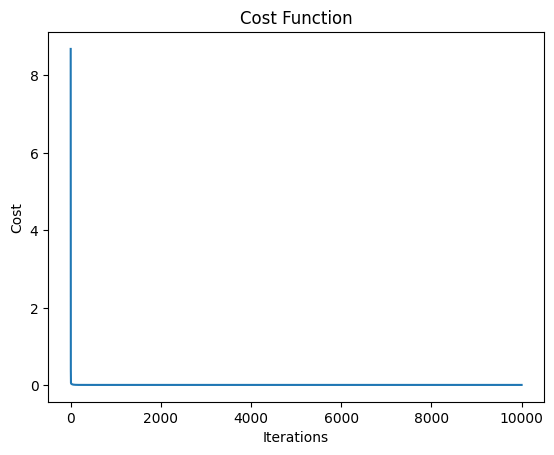

In [39]:
# Plotting the cost function
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

###Predicting Using Vectorized Gradient Descent

In [149]:
def Gradient_descent_vectorized (x, y, learning_rate, nb_iterations, initial_a):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    m=y.size
    a=initial_a 
    y = np.reshape(y, (1068, 1))
    for i in range(nb_iterations):
      y_pred = np.dot(x,a)
      diff =  y_pred - y
      cost = (1/(2*m))*np.sum(np.square(diff))
      derivative_a= (1/m)*np.dot(x.T,diff)
      a -= learning_rate * derivative_a
    return a


In [95]:
a = Gradient_descent_vectorized(X_train.values,y_train.values,0.1,10000,initial_a=np.ones((6, 1)))
a

array([[-0.17731369],
       [ 0.25340135],
       [ 0.00636315],
       [ 0.2468462 ],
       [ 0.04254243],
       [ 0.36661395]])

Writing a function that we'll use to make predictions

In [96]:
def predict_medical_charges (a, x):
  x = np.hstack((np.ones((x.shape[0], 1)), x))
  a = a.reshape(-1, 1)
  charges = np.dot(x, a)

  return charges

making a prediction of the medical charges on the first example we have in our training set

In [107]:
column_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64

In [106]:
row_to_predict = X_train.iloc[0, :].values
row_to_predict = row_to_predict.reshape(1, -1)
print(row_to_predict)
print(row_to_predict*column_max[:-1].values) #denormalized features

prediction = predict_medical_charges(a, row_to_predict)*column_max[-1]
print(prediction)

[[0.734375   1.         0.45774515 0.         0.        ]]
[[47.    1.   24.32  0.    0.  ]]
[[8171.14239659]]


###Linear Regression Model Evaluation

In [135]:
predicted_values = predict_medical_charges(a, X_test.values)*column_max[-1]

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the actual target values for the test set (y_test) and the predicted values (predicted_values_sklearn)
mae_sklearn = mean_absolute_error(y_test*column_max[-1], predicted_values)
mse_sklearn = mean_squared_error(y_test*column_max[-1], predicted_values)
rmse_sklearn = np.sqrt(mse_sklearn)

print("MAE (sklearn):", mae_sklearn)
print("MSE (sklearn):", mse_sklearn)
print("RMSE (sklearn):", rmse_sklearn)

MAE (sklearn): 4217.595795384445
MSE (sklearn): 34169759.8675224
RMSE (sklearn): 5845.490558329763


### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.


In [138]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
coefficients = model.coef_
intercept = model.intercept_

In [140]:
print("coefficients =" ,coefficients)
print("intercept = ",intercept)


coefficients = [0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]
intercept =  -0.17731121712023437


####Features importance (Coefficients)


Get the importance of each of your features, and compare the results with the ones we obtained in your gradient descent.

In [141]:
for feature, coef_gradient, coef_sklearn in zip(X_train.columns, a[1:], coefficients):
    print(f"{feature}: Coef GD = {coef_gradient[0]}, Coef Scikit-Learn = {coef_sklearn}")

age: Coef GD = 0.25340134656854935, Coef Scikit-Learn = 0.25340123892015703
sex: Coef GD = 0.006363146949501089, Coef Scikit-Learn = 0.006363051329000658
bmi: Coef GD = 0.24684620487671557, Coef Scikit-Learn = 0.2468421906447056
children: Coef GD = 0.04254242753967029, Coef Scikit-Learn = 0.04254233178756274
smoker: Coef GD = 0.36661394743452513, Coef Scikit-Learn = 0.36661390495979856


####Evaluation using Scikit learn

We start by calculating the predicted values for this model.

In [144]:
predicted_values_sklearn = model.predict(X_test)*column_max[-1]

In [145]:
predicted_values_sklearn[:5]

array([  566.60703029,  7741.65113472, 14383.49654951, 31715.92828453,
        8979.32475496])

Now we will evaluate the sklearn model using the sklearn library to get error metrics (MAE, MSE, RMSE)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the actual target values for the test set (y_test) and the predicted values (predicted_values_sklearn)
mae_sklearn = mean_absolute_error(y_test*column_max[-1], predicted_values_sklearn)
mse_sklearn = mean_squared_error(y_test*column_max[-1], predicted_values_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print("MAE (sklearn):", mae_sklearn)
print("MSE (sklearn):", mse_sklearn)
print("RMSE (sklearn):", rmse_sklearn)


MAE (sklearn): 4217.590933001889
MSE (sklearn): 34169808.821944006
RMSE (sklearn): 5845.494745694671


Calculate the R2 value 

In [148]:
r2_score = model.score(X_test, y_test)

print("R2 Score:", r2_score)

R2 Score: 0.8043792068989463
